# EDA Analysis with Visualizations (Seaborn)

## Total Person Arrested by ICE Raids

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

repo_path = r'C:\Users\xieha\OneDrive/BU/DS 701/project/ds-padilla-immigrant-raids'
file_path_unique = repo_path + '/EDA/df_unique.csv'
df_unique = pd.read_csv(file_path_unique)

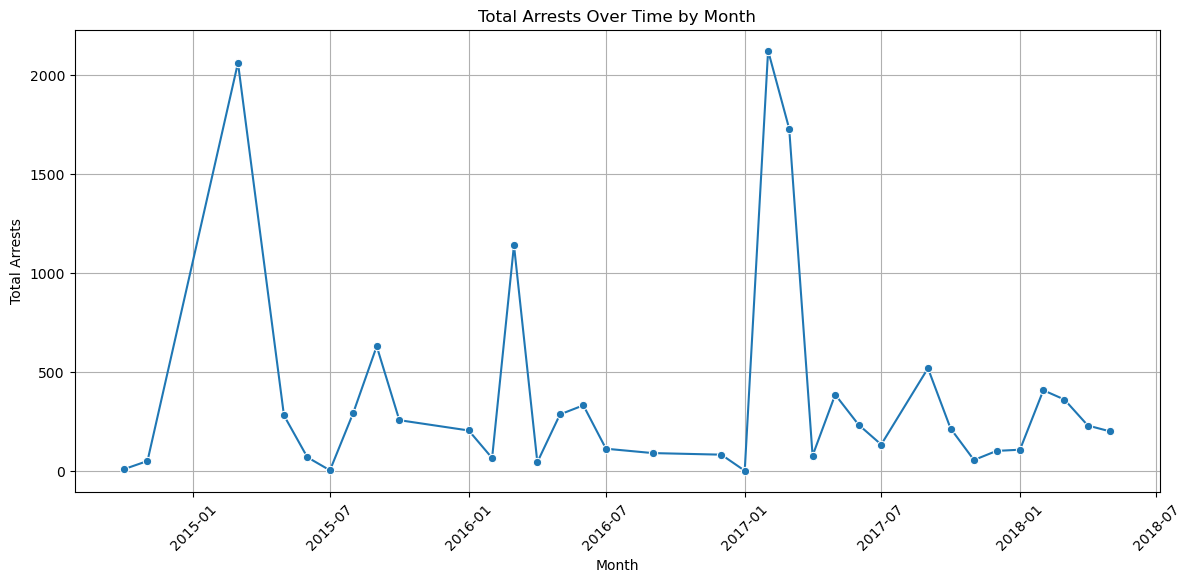

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'arrestdate' to datetime
df_unique['arrestdate'] = pd.to_datetime(df_unique['arrestdate'], errors='coerce')

# Step 2: Handle missing values and clean up 'arrests_total'
# Convert 'arrests_total' to numeric and drop rows with missing values
df_unique['arrests_total'] = pd.to_numeric(df_unique['arrests_total'], errors='coerce')
df_unique = df_unique.dropna(subset=['arrestdate', 'arrests_total'])

# Step 3: Group by month and aggregate arrests
df_unique['month_year'] = df_unique['arrestdate'].dt.to_period('M')
monthly_arrests = df_unique.groupby('month_year')['arrests_total'].sum().reset_index()

# Convert the 'month_year' period to datetime for plotting
monthly_arrests['month_year'] = monthly_arrests['month_year'].dt.to_timestamp()

# Step 4: Visualize using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_arrests, x='month_year', y='arrests_total', marker='o')
plt.title('Total Arrests Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

A visualization of number of persons arrested through out time.

## Total Arrests by ICE Raids

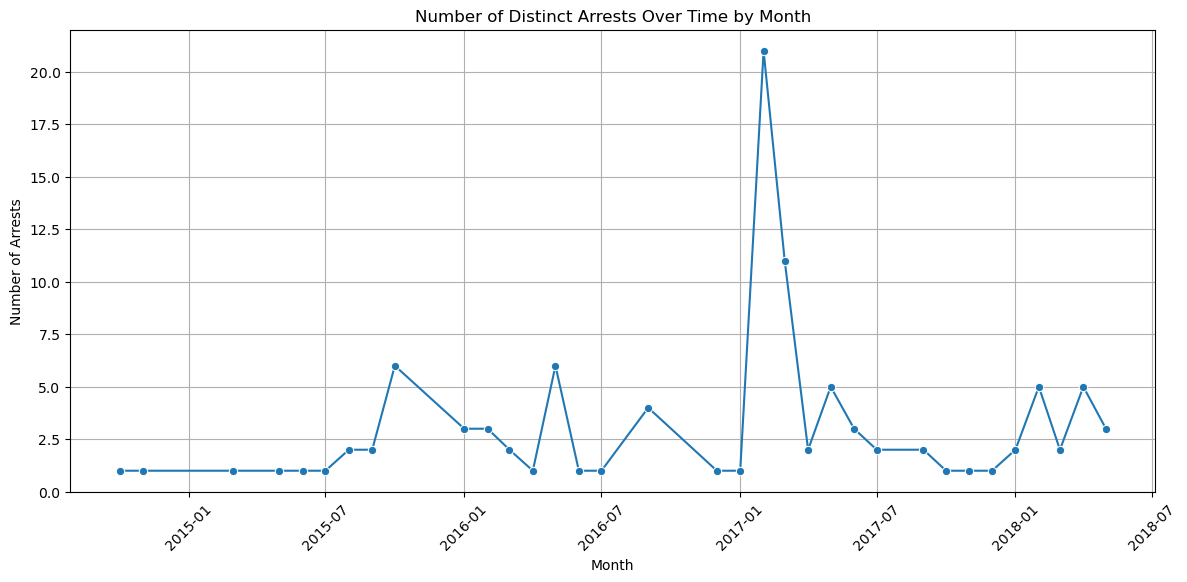

In [10]:
# Step 1: Group by month and count the number of arrests for each month
df_unique['month_year'] = df_unique['arrestdate'].dt.to_period('M')
monthly_arrest_count = df_unique['month_year'].value_counts().reset_index()
monthly_arrest_count.columns = ['month_year', 'arrest_count']

# Convert 'month_year' to a datetime format for proper plotting
monthly_arrest_count['month_year'] = monthly_arrest_count['month_year'].dt.to_timestamp()

# Step 2: Sort by month_year
monthly_arrest_count = monthly_arrest_count.sort_values('month_year')

# Step 3: Visualize using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_arrest_count, x='month_year', y='arrest_count', marker='o')
plt.title('Number of Distinct Arrests Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Total Arrests by Nationalities

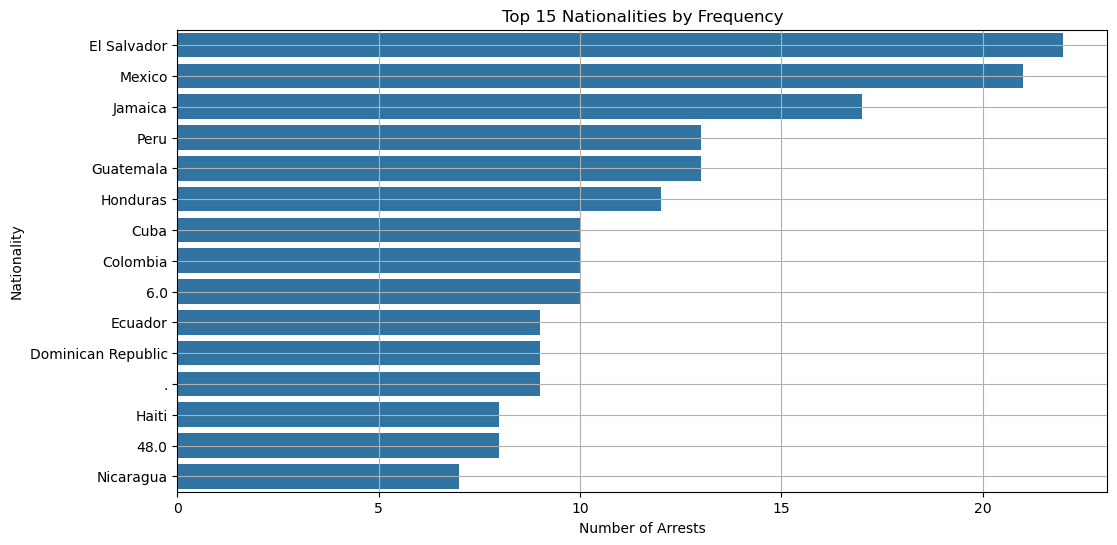

In [13]:
# Step 1: Extract and clean the 'Nationality_FIPS_List' column
df_unique['Nationality_FIPS_List'] = df_unique['Nationality_FIPS_List'].str.strip("[]").str.replace("'", "").str.split(',')

# Step 2: Create a list to store all nationalities
nationalities = df_unique['Nationality_FIPS_List'].dropna().explode().str.strip()

# Step 3: Count the frequency of each nationality
nationality_counts = nationalities.value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

# Step 4: Filter out empty or invalid entries
nationality_counts = nationality_counts[nationality_counts['Nationality'].str.lower() != 'nan']

# Step 5: Visualize the top 15 nationalities using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Nationality', data=nationality_counts.head(15))
plt.title('Top 15 Nationalities by Frequency')
plt.xlabel('Number of Arrests')
plt.ylabel('Nationality')
plt.grid(True)
plt.show()
